In [1]:
import yaml
from inspect import getsourcefile
import os.path
import os
os.system('module load gurobipy3')

import sys
import matplotlib

import matplotlib.pyplot as plt
import argparse
# import gurobipy
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = os.path.dirname(current_dir)
parent_parent_dir = os.path.dirname(parent_dir)
sys.path.insert(0, parent_parent_dir+"/heuristics")

print(parent_parent_dir+"/heuristics")

# parent_dir = current_dir[:current_dir.rfind(os.path.sep)]
sys.path.insert(0, parent_parent_dir)


from group import SEIR_group, DynamicalModel
import math
import pprint
import pandas as pd
import pickle
import numpy as np
from copy import deepcopy



/usr/local/ifs/projects/daniancu-covid-targets/covid-optimization/heuristics


heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-5579854.5', 'icus-2600.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-3719903.0', 'icus-2600.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-0.0', 'icus-2600.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 

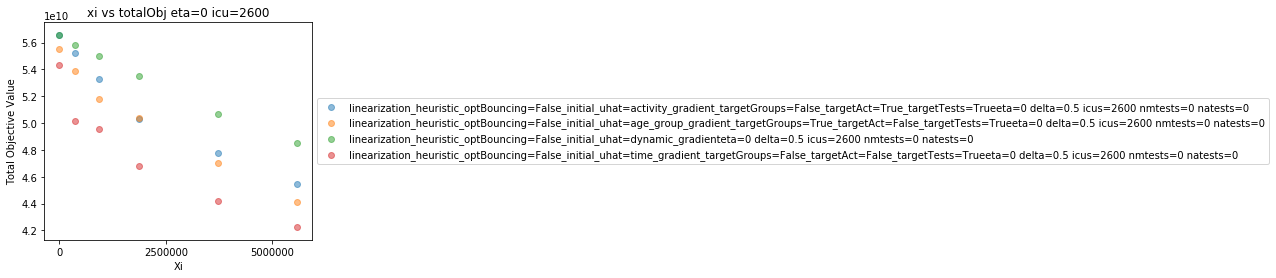

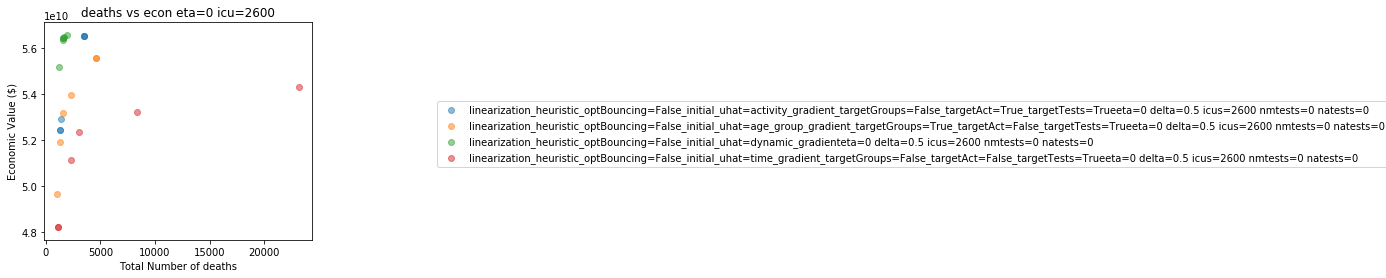

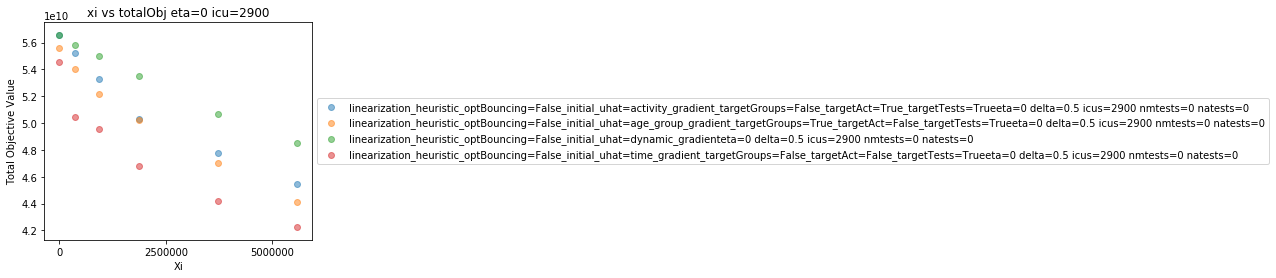

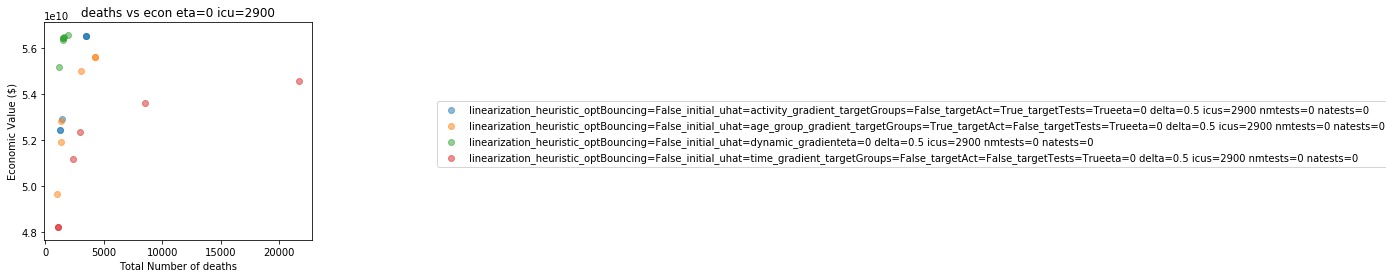

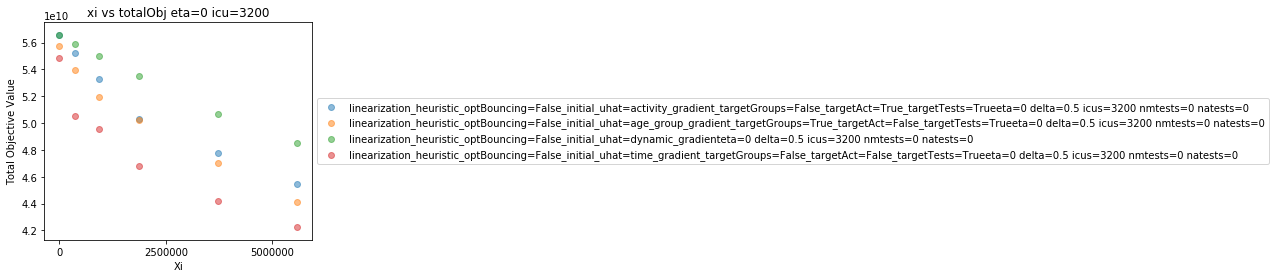

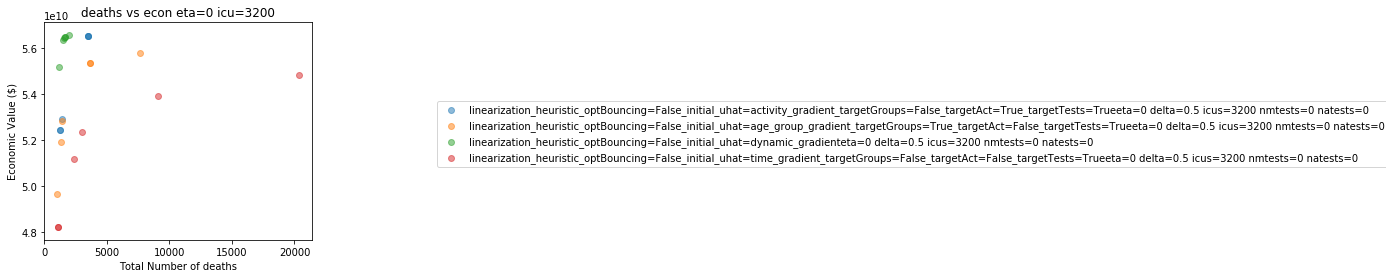

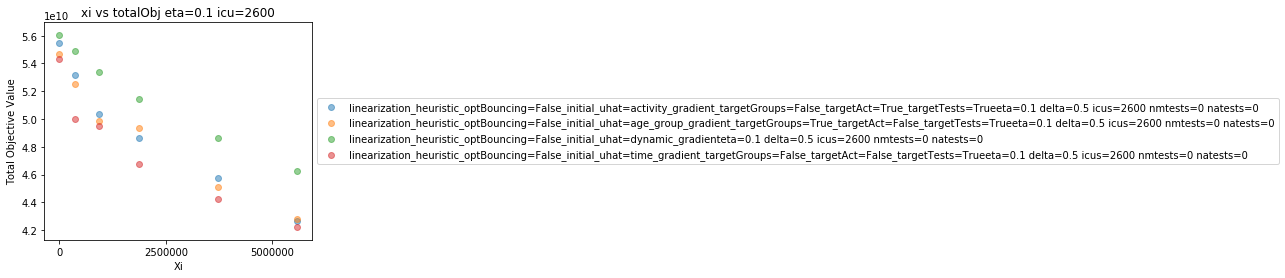

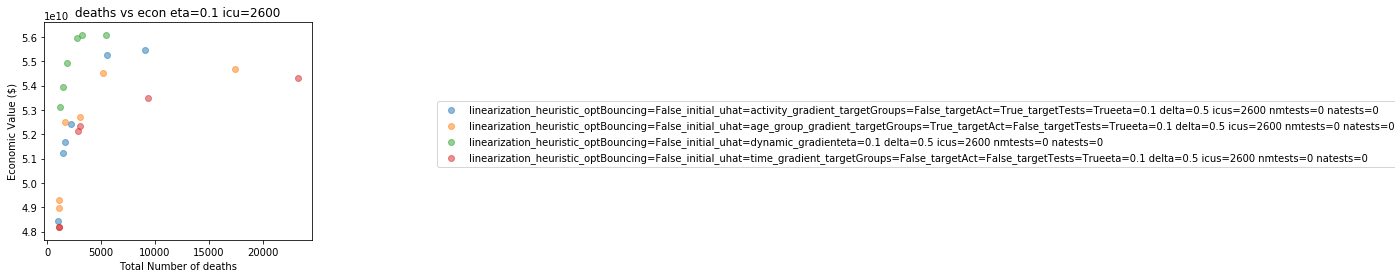

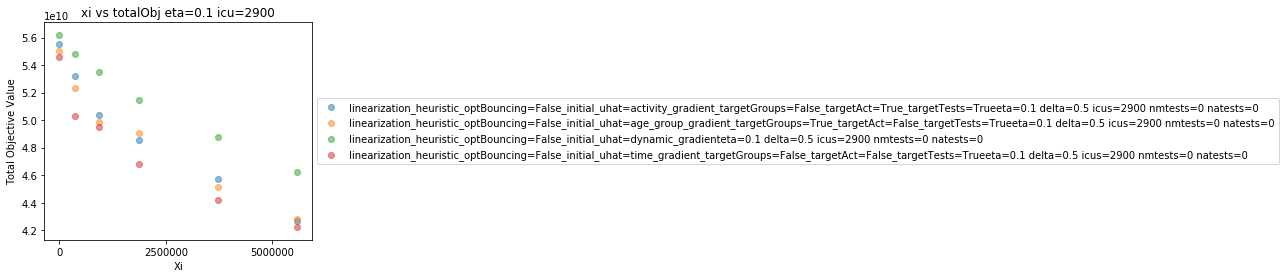

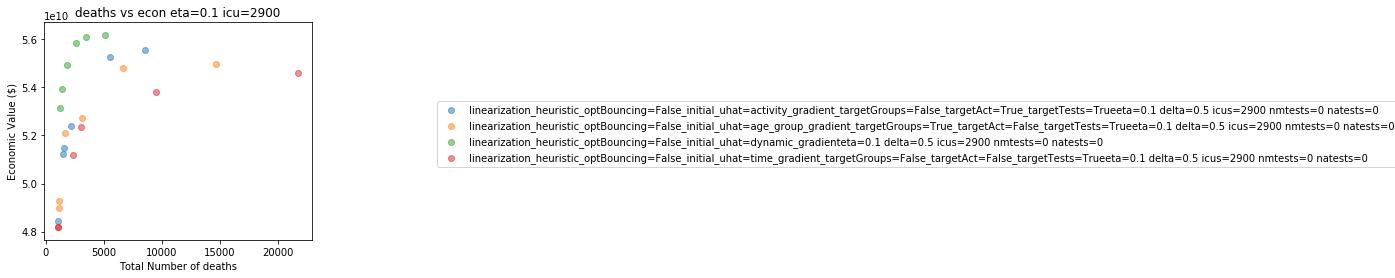

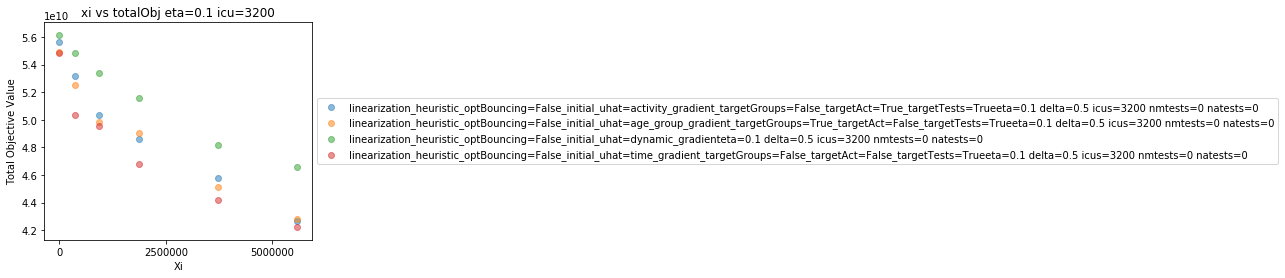

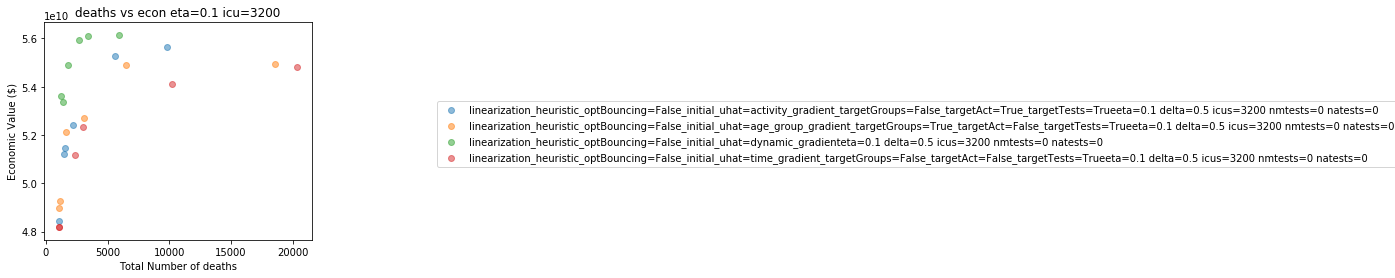

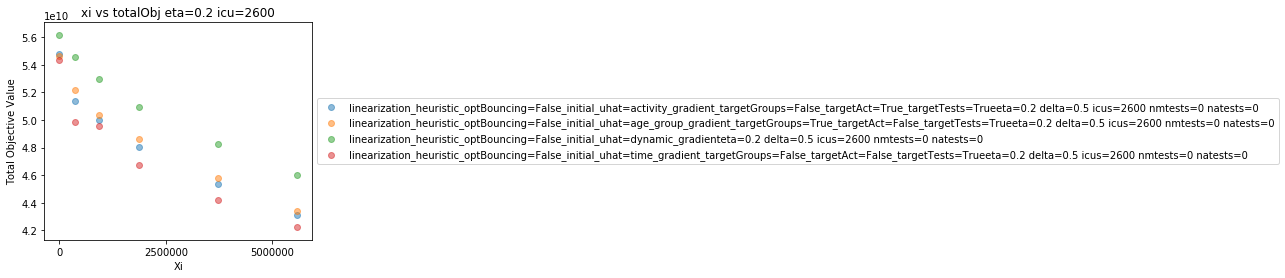

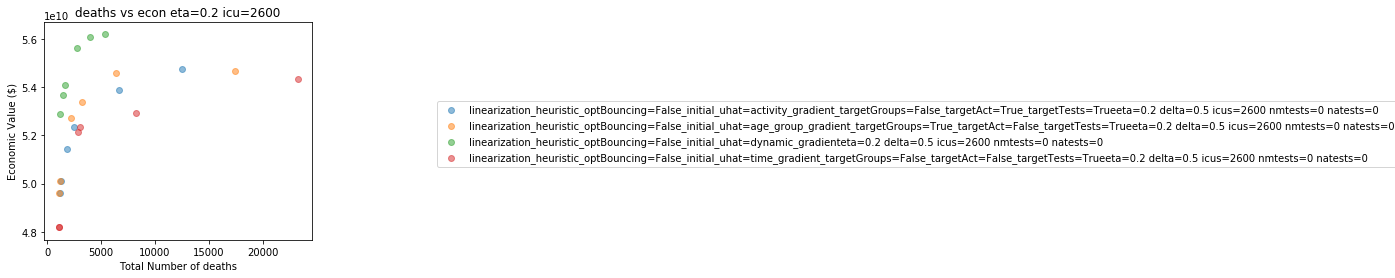

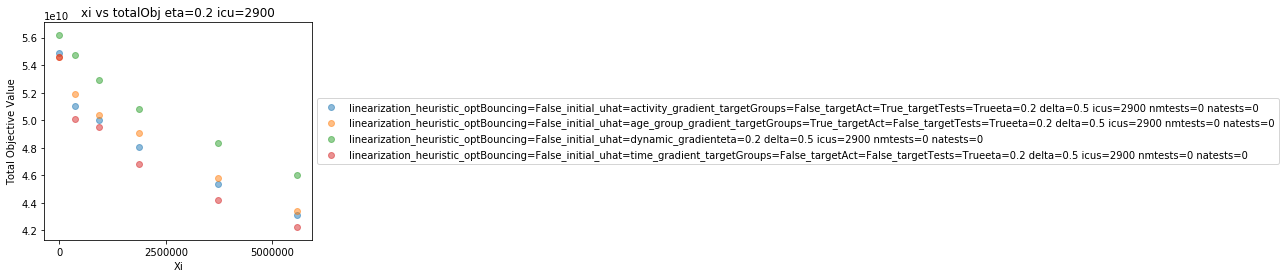

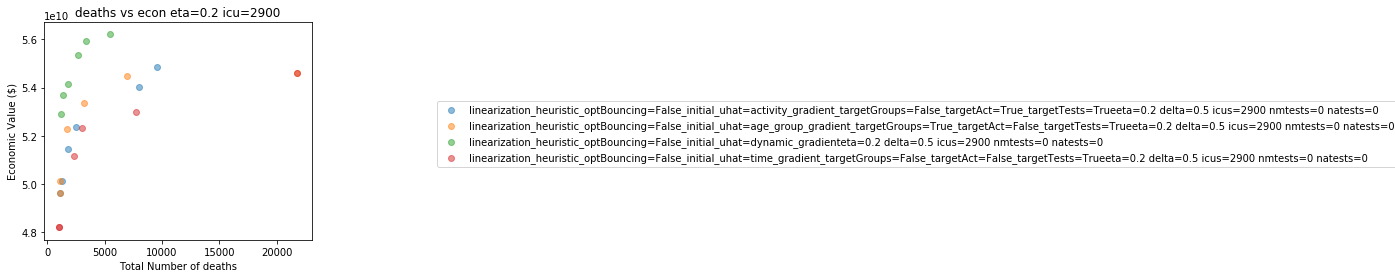

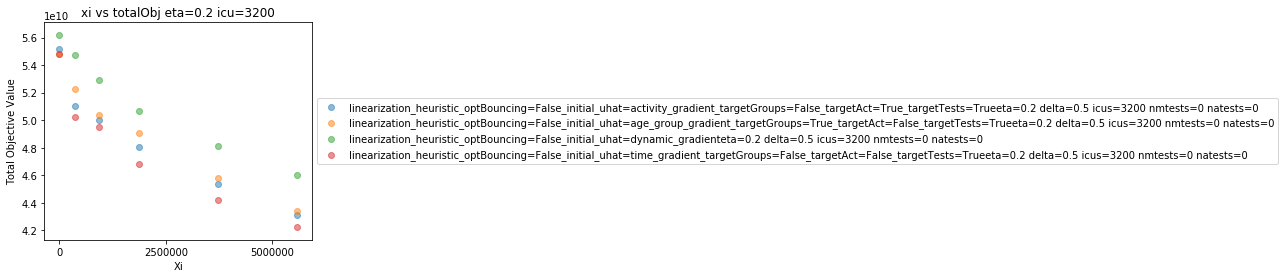

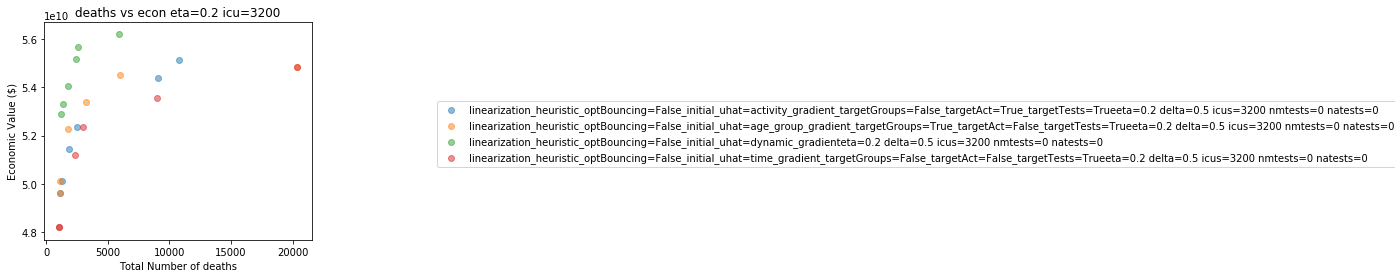

In [13]:
icus_to_try = [2600,2900,3200]
etas_to_try = [0,0.1,0.2]

for et in etas_to_try:
    for ic in icus_to_try:

        etas = [et]
        deltas = [0.5]
        icus = [ic]
        lockdown_freq=14
        testing_freq=7
        nmtests = [0]
        natests = [0]

        heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
        # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
        # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
        # ,"dynamic_gradient"]
        #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
        #  ["dynamic_gradient"]
        # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
        # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
        # ["dynamic_gradient"]
        # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

        # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        fig1, ax1 = plt.subplots(1)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis



        fig2, ax2 = plt.subplots(1)
        box = ax2.get_position()
        ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])





        for h in heurs:
            for e in etas:
                for d in deltas:
                    for i in icus:
                        for nm in nmtests:
                            for na in natests:
                                all_deaths = []
                                all_econ_values = []
                                all_xis = []
                                all_rewards = []
                                symbols = ["*",".","d","o","s","^"]
                                
                                for file_name in os.listdir(h):
                                    instance = file_name.split("_")

                                    for p in instance:
                                        if "xi" in p:
                                            xi = float(p.split("-")[1])
                            #                 print(xi)
                                        if "icus" in p:
                                            icu = float(p.split("-")[1])
                            #                 print(icu)
                                        if "natests" in p:
                                            natest = float(p.split("-")[1])
                            #                 print(natest)
                                        if "nmtests" in p:
                                            nmtest = float(p.split("-")[1])
                            #                 print(nmtest)
                                        if "dschool" in p:
                                            delta = float(p.split("-")[1])
                            #                 print(delta)
                                        if "eta" in p:
                                            eta = float(p.split("-")[1])
                            #                 print(eta)
                                    if eta == e and icu == i and nmtest == nm and natest == na and delta == d:
                                        print(h)
                                        print(instance)
                                        
                                        with open("%s/%s"%(h,file_name)) as file:
                                            result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                        # Read group parameters
                                        with open("../../parameters/fitted.yaml") as file:
                                            universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/econ.yaml") as file:
                                            econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read group parameters
                                        with open("../../parameters/one_group_fitted.yaml") as file:
                                            universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/one_group_econ.yaml") as file:
                                            econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                        start_day = result["experiment_params"]["start_day"]

                                        if result["groups"] == "one":
                                            universe_params = universe_params_one
                                            econ_params = econ_params_one

                                            with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)

                                        elif result["groups"] == "all":
                                            universe_params = universe_params_all
                                            econ_params = econ_params_all

                                            with open("../../initialization/oct21.yaml") as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)
                                        else:
                                            assert(False)

                                        experiment_params = result["experiment_params"]

                                        dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                        for t in range(experiment_params["T"]):
                                            dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                        dynModel.take_end_steps()

                                        deaths = dynModel.get_total_deaths()
                                        econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                        reward = dynModel.get_total_reward()
                                        
                                        all_deaths.append(deaths)
                                        all_econ_values.append(econ_value)
                                        all_xis.append(xi)
                                        all_rewards.append(reward)
                                    
                                print(all_rewards)
                                print(all_xis)
                                ax1.scatter(all_xis, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)
                                print(all_econ_values)
                                print(all_deaths)
                    

        # for x,y in zip(all_deaths, all_econ_values):

        #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            # ax2.annotate(label, # this is the text
            #                     (x,y), # this is the point to label
            #                     textcoords="offset points", # how to position the text
            #                     xytext=(0,10), # distance from text to points (x,y)
            #                     ha='center') # horizontal alignment can be left, right or center

        ax1.set(ylabel='Total Objective Value')
        ax1.set(xlabel='Xi')
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

        # Put a legend to the right of the current axis
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
        fig1.savefig(f"plots/xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



        ax2.set(ylabel='Economic Value ($)')
        ax2.set(xlabel='Total Number of deaths')


        fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
        fig2.savefig(f"plots/deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                    
        # for eta in etas:
        #     for delta in deltas:
        #         for icu in icus:
        #             for nmtest in nmtests:
        #                 for natest in natests:
        #                     for heur in heurs:
                                
                            





In [14]:
icus_to_try = [2600,2900,3200]
etas_to_try = [0,0.1,0.2]
nmtest_to_try = []

for et in etas_to_try:
    for ic in icus_to_try:

        etas = [et]
        deltas = [0.5]
        icus = [ic]
        lockdown_freq=14
        testing_freq=7
        nmtests = [0]
        natests = [0]

        heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True","linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=False"]
        
        #  "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
        # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
        # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
        # ,"dynamic_gradient"]
        #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
        #  ["dynamic_gradient"]
        # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
        # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
        # ["dynamic_gradient"]
        # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

        # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        fig1, ax1 = plt.subplots(1)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis



        fig2, ax2 = plt.subplots(1)
        box = ax2.get_position()
        ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])





        for h in heurs:
            for e in etas:
                for d in deltas:
                    for i in icus:
                        for nm in nmtests:
                            for na in natests:
                                all_deaths = []
                                all_econ_values = []
                                all_xis = []
                                all_rewards = []
                                symbols = ["*",".","d","o","s","^"]
                                
                                for file_name in os.listdir(h):
                                    instance = file_name.split("_")

                                    for p in instance:
                                        if "xi" in p:
                                            xi = float(p.split("-")[1])
                            #                 print(xi)
                                        if "icus" in p:
                                            icu = float(p.split("-")[1])
                            #                 print(icu)
                                        if "natests" in p:
                                            natest = float(p.split("-")[1])
                            #                 print(natest)
                                        if "nmtests" in p:
                                            nmtest = float(p.split("-")[1])
                            #                 print(nmtest)
                                        if "dschool" in p:
                                            delta = float(p.split("-")[1])
                            #                 print(delta)
                                        if "eta" in p:
                                            eta = float(p.split("-")[1])
                            #                 print(eta)
                                    if eta == e and icu == i and nmtest == nm and natest == na and delta == d:
                                        print(h)
                                        print(instance)
                                        
                                        with open("%s/%s"%(h,file_name)) as file:
                                            result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                        # Read group parameters
                                        with open("../../parameters/fitted.yaml") as file:
                                            universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/econ.yaml") as file:
                                            econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read group parameters
                                        with open("../../parameters/one_group_fitted.yaml") as file:
                                            universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/one_group_econ.yaml") as file:
                                            econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                        start_day = result["experiment_params"]["start_day"]

                                        if result["groups"] == "one":
                                            universe_params = universe_params_one
                                            econ_params = econ_params_one

                                            with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)

                                        elif result["groups"] == "all":
                                            universe_params = universe_params_all
                                            econ_params = econ_params_all

                                            with open("../../initialization/oct21.yaml") as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)
                                        else:
                                            assert(False)

                                        experiment_params = result["experiment_params"]

                                        dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                        for t in range(experiment_params["T"]):
                                            dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                        dynModel.take_end_steps()

                                        deaths = dynModel.get_total_deaths()
                                        econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                        reward = dynModel.get_total_reward()
                                        
                                        all_deaths.append(deaths)
                                        all_econ_values.append(econ_value)
                                        all_xis.append(xi)
                                        all_rewards.append(reward)
                                    
                                print(all_rewards)
                                print(all_xis)
                                ax1.scatter(all_xis, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)
                                print(all_econ_values)
                                print(all_deaths)
                    

        # for x,y in zip(all_deaths, all_econ_values):

        #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            # ax2.annotate(label, # this is the text
            #                     (x,y), # this is the point to label
            #                     textcoords="offset points", # how to position the text
            #                     xytext=(0,10), # distance from text to points (x,y)
            #                     ha='center') # horizontal alignment can be left, right or center

        ax1.set(ylabel='Total Objective Value')
        ax1.set(xlabel='Xi')
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

        # Put a legend to the right of the current axis
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
        fig1.savefig(f"plots/test_value_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



        ax2.set(ylabel='Economic Value ($)')
        ax2.set(xlabel='Total Number of deaths')


        fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
        fig2.savefig(f"plots/test_value_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                    
        # for eta in etas:
        #     for delta in deltas:
        #         for icu in icus:
        #             for nmtest in nmtests:
        #                 for natest in natests:
        #                     for heur in heurs:
                                
                            


, 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0', 'lockdownFreq-14', 'testingFreq-7.yaml']
[47758272363.98652, 53318500707.942085, 50291439570.240074, 55252695284.77838, 45425699263.48678, 56542158336.00259]
[3719903.0, 929975.75, 1859951.5, 371990.3, 5579854.5, 0.0]
[52423418564.986, 56542158336.002625, 52916441069.94418, 56542158336.002594, 52423418564.98599, 56542158336.00259]
[1254.1042605141797, 3466.3889118189777, 1411.3279296283308, 3466.3889118189777, 1254.1042605141797, 3466.3889118189777]
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=False
['xi-929975.75', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=False
['xi-1859951.5', 'icus-2900.0', 'te

KeyboardInterrupt: 